In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd

DATA_DIR = '/content/drive/MyDrive/Landmarks'

folders = [folder for folder in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, folder))]
print("Found folders (classes):", folders[:10])

if not folders:
    print("No folders found in", DATA_DIR)
else:
    first_folder = folders[0]
    folder_path = os.path.join(DATA_DIR, first_folder)

    csv_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.csv')]
    print(f"Found {len(csv_files)} CSV files in folder '{first_folder}'")

    if not csv_files:
        print("No CSV files found in", folder_path)
    else:
        sample_csv_path = os.path.join(folder_path, csv_files[0])
        print("Opening CSV file:", sample_csv_path)

        df = pd.read_csv(sample_csv_path)

        print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found folders (classes): ['come', 'a', 'dormitory', 'major', 'meaning', 'stomach', 'dvd', 'gone', 'daily', 'through']
Found 6 CSV files in folder 'come'
Opening CSV file: /content/drive/MyDrive/Landmarks/come/11878_frames_landmarks.csv
   frame_number        x1        y1            z1        x2        y2  \
0             0  0.533507  0.328414 -2.496491e-02  0.536178  0.290772   
1             1  0.683887  0.713077  2.234706e-09  0.709971  0.666657   
2             2  0.406886  0.621773  1.992783e-09  0.440020  0.649389   
3             3  0.517193  0.323373 -2.397137e-02  0.516020  0.288523   

         z2        x3        y3        z3  ...      x508      y508      z508  \
0 -0.036104  0.535574  0.304052 -0.022509  ...       NaN       NaN       NaN   
1  0.003358  0.713389  0.604114 -0.009496  ...       NaN       NaN       NaN   
2  0.011591  0.473568  0.6721

In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
import os

save_path = '/content/drive/MyDrive/processed_data1.pkl'

if os.path.exists(save_path):
    file_size = os.stat(save_path).st_size
    print(f"File size: {file_size} bytes")
else:
    print("File not found!")


File size: 812348851 bytes


In [ ]:
import pickle
import numpy as np

save_path = '/content/drive/MyDrive/processed_data1.pkl'

with open(save_path, 'rb') as f:
    data = pickle.load(f)

X_pad = data['X_pad']
y_cat = data['y_cat']
word_to_counter = data['word_to_counter']

print("Preprocessed data loaded successfully!")


print("\nShapes:")
print("X_pad shape:", X_pad.shape)  # e.g., (12505, 8, 1530)
print("y_cat shape:", y_cat.shape)  # e.g., (12505, 2000)

print("\nNumber of classes (words):", len(word_to_counter))

print("\nFirst sample in X_pad (first 2 frames):")
print(X_pad[0][:2])

print("\nFirst 5 one-hot encoded labels:")
print(y_cat[:5])

print("\nSample of word_to_counter mapping (first ten entries):")
for i, (word, count) in enumerate(word_to_counter.items()):
    if i >= 10:
        break
    print(f"{word}: {count}")


Preprocessed data loaded successfully!

Shapes:
X_pad shape: (12505, 8, 1530)
y_cat shape: (12505, 2000)

Number of classes (words): 2000

First sample in X_pad (first 2 frames):
[[ 5.3350699e-01  3.2841370e-01 -2.4964910e-02 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 6.8388706e-01  7.1307677e-01  2.2347064e-09 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]

First 5 one-hot encoded labels:
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]

Sample of word_to_counter mapping (first ten entries):
come: 1
a: 2
dormitory: 3
major: 4
meaning: 5
stomach: 6
dvd: 7
gone: 8
daily: 9
through: 10


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras


y_encoded_full = np.argmax(y_cat, axis=1)

class_counts = np.bincount(y_encoded_full)
sorted_classes = np.argsort(class_counts)
# Select top 200 classes (with highest frequency)
top_200_classes = sorted_classes[-200:]
print("Top 200 class indices:", top_200_classes)


mask_top200 = np.isin(y_encoded_full, top_200_classes)
X_top = X_pad[mask_top200]
y_top = y_cat[mask_top200]
y_top_numeric = y_encoded_full[mask_top200]
print("Filtered data shape:", X_top.shape, y_top.shape)

Top 200 class indices: [ 130  468  454 1218  757  780  470 1103 1104 1063 1315 1272 1314 1486
  560   82  519 1049  533  500 1622 1160  698  742 1545  279 1564 1512
 1861  338  198 1330  799  948 1484 1994 1464 1426  158   60 1699  311
  450  160 1151  787  447  842  960  395  174 1212 1620  744  676 1670
  773  810  811  624  751  400  296  554   24  612  587  317  747  551
 1795 1547  295 1188   80  299   14 1467  819  481  848 1069  804  782
 1951 1911  790 1929 1277  425  831 1233 1153 1193 1550 1206  547 1704
  302 1300  905 1761  998 1651 1306  963  264 1961 1461 1235  641 1962
 1472  664  602  882 1682  852  248  277 1410  912 1371  914  121 1745
 1742 1741  614 1205 1318 1065  902  327 1064 1393  218  794 1592 1734
 1014 1173 1784  565  606 1675 1379  735  740 1297  282 1529  997  394
 1105 1549  546 1232  105  631  865   49  701 1531 1098 1740 1640  945
 1414 1608 1430 1433  700 1271 1598 1847 1807 1539 1337  791 1522 1146
  347  720  440  210  976 1263 1022 1639 1087  961 129

In [ ]:
# Invert the original word_to_counter dictionary:
counter_to_word = {v: k for k, v in word_to_counter.items()}

sorted_top200 = sorted(top_200_classes)

# Create a list of words corresponding to the top 200 classes.
words_200 = [counter_to_word[old_label] for old_label in sorted_top200]

print("List of 200 words used for training:")
print(words_200)

List of 200 words used for training:
['small', 'soap', 'thick', 'bug', 'rose', 'suffer', 'ireland', 'plate', 'dinner', 'bus', 'fun', 'all', 'u', 'r', 'quit', 'education', 'drum', 'comfortable', 'suspend', 'rescue', 'silent', 'graduate', 'second', 'divide', 'belief', 'fear', 'excited', 'cards', 'allergy', 'preschool', 'example', 'investigate', 'bear', 'giraffe', 'apart', 'candle', 'until', 'rent', 'once', 'energy', 'curriculum', 'paragraph', 'belt', 'tower', 'no', 'quality', 'decrease', 'apostrophe', 'adopt', 'test', 'anatomy', 'swimsuit', 'evidence', 'license', 'saw', 'occur', 'with', 'something', 'post', 'explain', 'opposite', 'puzzled', 'last', 'pumpkin', 'cochlear implant', 'fingerspell', 'learn', 'shape', 'court', 'gather', 'nurse', 'ocean', 'bath', 'peaceful', 'hammer', 'friend', 'interest', 'not yet', 'please', 'forbid', 'again', 'russia', 'exaggerate', 'policeman', 'restaurant', 'positive', 'next', 'difficult', 'home', 'month', 'princess', 'strange', 'tree', 'guide', 'grab', 'va

In [ ]:

def augment_sample(sample, noise_std=0.01):
    """
    Augments a given sample by adding Gaussian noise.
    sample: numpy array of shape (MAX_SEQ_LENGTH, num_features)
    noise_std: standard deviation of the Gaussian noise
    """
    noise = np.random.normal(loc=0.0, scale=noise_std, size=sample.shape)
    return sample + noise

augmented_X = []
augmented_y_numeric = []

desired_count = 300

for cls in top_200_classes:
    # Find indices for samples belonging to this class.
    cls_indices = np.where(y_top_numeric == cls)[0]
    current_samples = X_top[cls_indices]
    current_labels = y_top_numeric[cls_indices]
    current_count = len(current_samples)

    # Append the original samples.
    augmented_X.extend(current_samples)
    augmented_y_numeric.extend(current_labels)

    # If fewer than desired_count, generate additional samples.
    if current_count < desired_count:
        num_to_generate = desired_count - current_count
        chosen_indices = np.random.choice(current_count, size=num_to_generate, replace=True)
        for idx in chosen_indices:
            new_sample = augment_sample(current_samples[idx], noise_std=0.01)
            augmented_X.append(new_sample)
            augmented_y_numeric.append(current_labels[idx])

# Convert lists to numpy arrays.
X_aug = np.array(augmented_X)
y_aug_numeric = np.array(augmented_y_numeric)
print("Augmented X shape:", X_aug.shape)
print("Augmented y shape:", y_aug_numeric.shape)

Augmented X shape: (60000, 8, 1530)
Augmented y shape: (60000,)


In [ ]:

new_label_map = {old_label: new_label for new_label, old_label in enumerate(sorted(top_200_classes))}
print("New label mapping (sample):", dict(list(new_label_map.items())[:10]))

# Remap labels
y_aug_new = np.array([new_label_map[label] for label in y_aug_numeric])

# One-hot encode the new labels (now with 200 classes)
y_aug_cat = tf.keras.utils.to_categorical(y_aug_new, num_classes=200)

print("Final augmented labels shape (one-hot):", y_aug_cat.shape)


X_train, X_temp, y_train, y_temp, y_train_enc, y_temp_enc = train_test_split(
    X_aug, y_aug_cat, y_aug_new, test_size=0.30, random_state=42, stratify=y_aug_new
)

# Then, split the remaining 30% equally into validation (15%) and test (15%).
X_val, X_test, y_val, y_test, y_val_enc, y_test_enc = train_test_split(
    X_temp, y_temp, y_temp_enc, test_size=0.5, random_state=42, stratify=y_temp_enc
)


print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])
print("Testing samples:", X_test.shape[0])


New label mapping (sample): {14: 0, 24: 1, 49: 2, 60: 3, 80: 4, 82: 5, 105: 6, 121: 7, 130: 8, 158: 9}
Final augmented labels shape (one-hot): (60000, 200)
Training samples: 42000
Validation samples: 9000
Testing samples: 9000


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Masking, Bidirectional, LSTM, BatchNormalization, Dropout, Dense
from sklearn.model_selection import train_test_split


input_shape = X_train.shape[1:]  # e.g., (8, 1530)
model = Sequential([
    Input(shape=input_shape),
    Masking(mask_value=0.0),
    Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.1)),
    BatchNormalization(),
    Dropout(0.4),
    Bidirectional(LSTM(128, recurrent_dropout=0.1)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(200, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Define callbacks (optional but recommended)
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/best_asl_200_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("Test accuracy for 200-class model: {:.2f}%".format(test_acc * 100))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking (Masking)                    │ (None, 8, 1530)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 8, 256)              │       1,698,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          25,800 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,154,312 (8.22 MB)

 Trainable params: 2,153,032 (8.21 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.0099 - loss: 5.5286
Epoch 1: val_accuracy improved from -inf to 0.03156, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 124s 83ms/step - accuracy: 0.0099 - loss: 5.5284 - val_accuracy: 0.0316 - val_loss: 4.7336 - learning_rate: 0.0010
Epoch 2/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.0290 - loss: 4.7742
Epoch 2: val_accuracy improved from 0.03156 to 0.06678, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 104s 79ms/step - accuracy: 0.0290 - loss: 4.7742 - val_accuracy: 0.0668 - val_loss: 4.3050 - learning_rate: 0.0010
Epoch 3/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.0575 - loss: 4.3667
Epoch 3: val_accuracy improved from 0.06678 to 0.09933, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 104s 79ms/step - accuracy: 0.0575 - loss: 4.3667 - val_accuracy: 0.0993 - val_loss: 3.9277 - learning_rate: 0.0010
Epoch 4/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.0896 - loss: 4.0530
Epoch 4: val_accuracy improved from 0.09933 to 0.17922, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 104s 79ms/step - accuracy: 0.0896 - loss: 4.0530 - val_accuracy: 0.1792 - val_loss: 3.4398 - learning_rate: 0.0010
Epoch 5/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.1179 - loss: 3.7964
Epoch 5: val_accuracy improved from 0.17922 to 0.22900, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 104s 80ms/step - accuracy: 0.1179 - loss: 3.7964 - val_accuracy: 0.2290 - val_loss: 3.1299 - learning_rate: 0.0010
Epoch 6/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.1421 - loss: 3.5902
Epoch 6: val_accuracy improved from 0.22900 to 0.25878, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 105s 80ms/step - accuracy: 0.1421 - loss: 3.5902 - val_accuracy: 0.2588 - val_loss: 2.9088 - learning_rate: 0.0010
Epoch 7/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.1778 - loss: 3.3515
Epoch 7: val_accuracy improved from 0.25878 to 0.34733, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 106s 80ms/step - accuracy: 0.1778 - loss: 3.3515 - val_accuracy: 0.3473 - val_loss: 2.5440 - learning_rate: 0.0010
Epoch 8/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2075 - loss: 3.1731
Epoch 8: val_accuracy improved from 0.34733 to 0.39267, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 104s 79ms/step - accuracy: 0.2075 - loss: 3.1731 - val_accuracy: 0.3927 - val_loss: 2.2957 - learning_rate: 0.0010
Epoch 9/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2428 - loss: 2.9896
Epoch 9: val_accuracy did not improve from 0.39267
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 103s 79ms/step - accuracy: 0.2428 - loss: 2.9896 - val_accuracy: 0.3532 - val_loss: 2.4131 - learning_rate: 0.0010
Epoch 10/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2671 - loss: 2.8426
Epoch 10: val_accuracy improved from 0.39267 to 0.45111, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 104s 79ms/step - accuracy: 0.2671 - loss: 2.8426 - val_accuracy: 0.4511 - val_loss: 2.0218 - learning_rate: 0.0010
Epoch 11/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2958 - loss: 2.7140
Epoch 11: val_accuracy did not improve from 0.45111
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 103s 78ms/step - accuracy: 0.2958 - loss: 2.7140 - val_accuracy: 0.4314 - val_loss: 2.0745 - learning_rate: 0.0010
Epoch 12/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3159 - loss: 2.5896
Epoch 12: val_accuracy improved from 0.45111 to 0.45922, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 104s 79ms/step - accuracy: 0.3159 - loss: 2.5896 - val_accuracy: 0.4592 - val_loss: 1.9757 - learning_rate: 0.0010
Epoch 13/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3391 - loss: 2.4776
Epoch 13: val_accuracy improved from 0.45922 to 0.56967, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 104s 79ms/step - accuracy: 0.3391 - loss: 2.4776 - val_accuracy: 0.5697 - val_loss: 1.5867 - learning_rate: 0.0010
Epoch 14/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.3689 - loss: 2.3479
Epoch 14: val_accuracy improved from 0.56967 to 0.61133, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 105s 80ms/step - accuracy: 0.3689 - loss: 2.3479 - val_accuracy: 0.6113 - val_loss: 1.4379 - learning_rate: 0.0010
Epoch 15/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.3852 - loss: 2.2857
Epoch 15: val_accuracy did not improve from 0.61133
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 104s 79ms/step - accuracy: 0.3852 - loss: 2.2857 - val_accuracy: 0.5900 - val_loss: 1.4357 - learning_rate: 0.0010
Epoch 16/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4021 - loss: 2.2004
Epoch 16: val_accuracy improved from 0.61133 to 0.64967, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 105s 80ms/step - accuracy: 0.4021 - loss: 2.2004 - val_accuracy: 0.6497 - val_loss: 1.2452 - learning_rate: 0.0010
Epoch 17/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4228 - loss: 2.1215
Epoch 17: val_accuracy improved from 0.64967 to 0.69767, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 105s 80ms/step - accuracy: 0.4228 - loss: 2.1215 - val_accuracy: 0.6977 - val_loss: 1.1101 - learning_rate: 0.0010
Epoch 18/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4410 - loss: 2.0495
Epoch 18: val_accuracy did not improve from 0.69767
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 104s 79ms/step - accuracy: 0.4410 - loss: 2.0495 - val_accuracy: 0.6256 - val_loss: 1.3084 - learning_rate: 0.0010
Epoch 19/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4651 - loss: 1.9485
Epoch 19: val_accuracy did not improve from 0.69767
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 105s 80ms/step - accuracy: 0.4651 - loss: 1.9485 - val_accuracy: 0.5124 - val_loss: 1.7239 - learning_rate: 0.0010
Epoch 20/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4789 - loss: 1.8877
Epoch 20: val_accuracy did not improve from 0.69767
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 107s 81ms/step - accuracy: 0.4789 - loss: 1.8877 - val_accuracy: 0.6309 - val_loss: 1.2537 - learning_

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 109s 83ms/step - accuracy: 0.4915 - loss: 1.8360 - val_accuracy: 0.6979 - val_loss: 1.0228 - learning_rate: 0.0010
Epoch 22/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5022 - loss: 1.7902
Epoch 22: val_accuracy improved from 0.69789 to 0.74333, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/step - accuracy: 0.5022 - loss: 1.7902 - val_accuracy: 0.7433 - val_loss: 0.8871 - learning_rate: 0.0010
Epoch 23/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5248 - loss: 1.7089
Epoch 23: val_accuracy improved from 0.74333 to 0.77633, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/step - accuracy: 0.5248 - loss: 1.7089 - val_accuracy: 0.7763 - val_loss: 0.7671 - learning_rate: 0.0010
Epoch 24/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5330 - loss: 1.6753
Epoch 24: val_accuracy did not improve from 0.77633
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 107s 82ms/step - accuracy: 0.5330 - loss: 1.6753 - val_accuracy: 0.7526 - val_loss: 0.8386 - learning_rate: 0.0010
Epoch 25/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5497 - loss: 1.6146
Epoch 25: val_accuracy improved from 0.77633 to 0.78011, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 109s 83ms/step - accuracy: 0.5497 - loss: 1.6146 - val_accuracy: 0.7801 - val_loss: 0.7348 - learning_rate: 0.0010
Epoch 26/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5675 - loss: 1.5510
Epoch 26: val_accuracy did not improve from 0.78011
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 105s 80ms/step - accuracy: 0.5675 - loss: 1.5510 - val_accuracy: 0.7583 - val_loss: 0.8168 - learning_rate: 0.0010
Epoch 27/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5745 - loss: 1.5065
Epoch 27: val_accuracy did not improve from 0.78011
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 104s 79ms/step - accuracy: 0.5745 - loss: 1.5065 - val_accuracy: 0.7779 - val_loss: 0.7541 - learning_rate: 0.0010
Epoch 28/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5942 - loss: 1.4594
Epoch 28: val_accuracy improved from 0.78011 to 0.79256, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 107s 81ms/step - accuracy: 0.5942 - loss: 1.4594 - val_accuracy: 0.7926 - val_loss: 0.7026 - learning_rate: 0.0010
Epoch 29/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6020 - loss: 1.4067
Epoch 29: val_accuracy did not improve from 0.79256
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 105s 80ms/step - accuracy: 0.6020 - loss: 1.4067 - val_accuracy: 0.7646 - val_loss: 0.8058 - learning_rate: 0.0010
Epoch 30/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6150 - loss: 1.3635
Epoch 30: val_accuracy did not improve from 0.79256
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 105s 80ms/step - accuracy: 0.6150 - loss: 1.3636 - val_accuracy: 0.7486 - val_loss: 0.8601 - learning_rate: 0.0010
Epoch 31/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6235 - loss: 1.3346
Epoch 31: val_accuracy improved from 0.79256 to 0.79678, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 110s 84ms/step - accuracy: 0.6235 - loss: 1.3346 - val_accuracy: 0.7968 - val_loss: 0.6921 - learning_rate: 0.0010
Epoch 32/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6341 - loss: 1.2999
Epoch 32: val_accuracy did not improve from 0.79678
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 107s 82ms/step - accuracy: 0.6341 - loss: 1.2999 - val_accuracy: 0.7671 - val_loss: 0.7928 - learning_rate: 0.0010
Epoch 33/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6403 - loss: 1.2673
Epoch 33: val_accuracy did not improve from 0.79678
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 107s 82ms/step - accuracy: 0.6403 - loss: 1.2673 - val_accuracy: 0.7142 - val_loss: 0.9932 - learning_rate: 0.0010
Epoch 34/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6523 - loss: 1.2270
Epoch 34: val_accuracy did not improve from 0.79678
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 107s 82ms/step - accuracy: 0.6523 - loss: 1.2271 - val_accuracy: 0.7622 - val_loss: 0.8381 - learning_

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 110s 83ms/step - accuracy: 0.6546 - loss: 1.2155 - val_accuracy: 0.8511 - val_loss: 0.5084 - learning_rate: 0.0010
Epoch 36/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6685 - loss: 1.1577
Epoch 36: val_accuracy did not improve from 0.85111
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/step - accuracy: 0.6685 - loss: 1.1577 - val_accuracy: 0.8154 - val_loss: 0.6222 - learning_rate: 0.0010
Epoch 37/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6753 - loss: 1.1269
Epoch 37: val_accuracy did not improve from 0.85111
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 106s 81ms/step - accuracy: 0.6753 - loss: 1.1269 - val_accuracy: 0.8312 - val_loss: 0.5788 - learning_rate: 0.0010
Epoch 38/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6887 - loss: 1.1068
Epoch 38: val_accuracy did not improve from 0.85111
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 104s 79ms/step - accuracy: 0.6887 - loss: 1.1069 - val_accuracy: 0.8349 - val_loss: 0.5882 - learning_

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 110s 84ms/step - accuracy: 0.7296 - loss: 0.9352 - val_accuracy: 0.8571 - val_loss: 0.4979 - learning_rate: 5.0000e-04
Epoch 42/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7504 - loss: 0.8710
Epoch 42: val_accuracy improved from 0.85711 to 0.86211, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/step - accuracy: 0.7504 - loss: 0.8710 - val_accuracy: 0.8621 - val_loss: 0.5022 - learning_rate: 5.0000e-04
Epoch 43/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7598 - loss: 0.8324
Epoch 43: val_accuracy improved from 0.86211 to 0.87233, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 109s 83ms/step - accuracy: 0.7598 - loss: 0.8324 - val_accuracy: 0.8723 - val_loss: 0.4684 - learning_rate: 5.0000e-04
Epoch 44/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7611 - loss: 0.8352
Epoch 44: val_accuracy did not improve from 0.87233
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/step - accuracy: 0.7611 - loss: 0.8352 - val_accuracy: 0.8707 - val_loss: 0.4740 - learning_rate: 5.0000e-04
Epoch 45/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7699 - loss: 0.7887
Epoch 45: val_accuracy did not improve from 0.87233
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/step - accuracy: 0.7699 - loss: 0.7887 - val_accuracy: 0.8627 - val_loss: 0.5080 - learning_rate: 5.0000e-04
Epoch 46/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7765 - loss: 0.7739
Epoch 46: val_accuracy improved from 0.87233 to 0.87367, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 110s 84ms/step - accuracy: 0.7765 - loss: 0.7739 - val_accuracy: 0.8737 - val_loss: 0.4975 - learning_rate: 5.0000e-04
Epoch 47/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7751 - loss: 0.7731
Epoch 47: val_accuracy did not improve from 0.87367
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/step - accuracy: 0.7751 - loss: 0.7731 - val_accuracy: 0.8308 - val_loss: 0.6145 - learning_rate: 5.0000e-04
Epoch 48/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7842 - loss: 0.7599
Epoch 48: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 48: val_accuracy did not improve from 0.87367
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/step - accuracy: 0.7842 - loss: 0.7599 - val_accuracy: 0.8481 - val_loss: 0.5893 - learning_rate: 5.0000e-04
Epoch 49/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7977 - loss: 0.6964
Epoch 49: val_accuracy improved from 0.87367 to 0.89144, saving model to /content/drive/MyDrive

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 110s 84ms/step - accuracy: 0.7977 - loss: 0.6964 - val_accuracy: 0.8914 - val_loss: 0.4234 - learning_rate: 2.5000e-04
Epoch 50/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8084 - loss: 0.6735
Epoch 50: val_accuracy did not improve from 0.89144
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/step - accuracy: 0.8084 - loss: 0.6735 - val_accuracy: 0.8892 - val_loss: 0.4249 - learning_rate: 2.5000e-04
Epoch 51/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8091 - loss: 0.6536
Epoch 51: val_accuracy did not improve from 0.89144
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 107s 82ms/step - accuracy: 0.8091 - loss: 0.6536 - val_accuracy: 0.8880 - val_loss: 0.4371 - learning_rate: 2.5000e-04
Epoch 52/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8150 - loss: 0.6425
Epoch 52: val_accuracy improved from 0.89144 to 0.89378, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 110s 83ms/step - accuracy: 0.8150 - loss: 0.6425 - val_accuracy: 0.8938 - val_loss: 0.4238 - learning_rate: 2.5000e-04
Epoch 53/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8253 - loss: 0.6203
Epoch 53: val_accuracy did not improve from 0.89378
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 107s 81ms/step - accuracy: 0.8253 - loss: 0.6203 - val_accuracy: 0.8859 - val_loss: 0.4503 - learning_rate: 2.5000e-04
Epoch 54/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8237 - loss: 0.6074
Epoch 54: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 54: val_accuracy did not improve from 0.89378
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 107s 81ms/step - accuracy: 0.8237 - loss: 0.6074 - val_accuracy: 0.8886 - val_loss: 0.4397 - learning_rate: 2.5000e-04
Epoch 55/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8283 - loss: 0.5935
Epoch 55: val_accuracy did not improve from 0.89378
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/st

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 110s 84ms/step - accuracy: 0.8284 - loss: 0.5990 - val_accuracy: 0.8971 - val_loss: 0.4140 - learning_rate: 1.2500e-04
Epoch 57/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8328 - loss: 0.5775
Epoch 57: val_accuracy did not improve from 0.89711
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/step - accuracy: 0.8328 - loss: 0.5775 - val_accuracy: 0.8918 - val_loss: 0.4352 - learning_rate: 1.2500e-04
Epoch 58/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8354 - loss: 0.5754
Epoch 58: val_accuracy did not improve from 0.89711
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/step - accuracy: 0.8354 - loss: 0.5754 - val_accuracy: 0.8971 - val_loss: 0.4244 - learning_rate: 1.2500e-04
Epoch 59/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8345 - loss: 0.5828
Epoch 59: val_accuracy did not improve from 0.89711
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/step - accuracy: 0.8345 - loss: 0.5828 - val_accuracy: 0.8904 - val_loss: 0.4549

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 110s 84ms/step - accuracy: 0.8411 - loss: 0.5465 - val_accuracy: 0.9007 - val_loss: 0.4166 - learning_rate: 6.2500e-05
Epoch 63/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8415 - loss: 0.5470
Epoch 63: val_accuracy did not improve from 0.90067
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 109s 83ms/step - accuracy: 0.8415 - loss: 0.5470 - val_accuracy: 0.9006 - val_loss: 0.4201 - learning_rate: 6.2500e-05
Epoch 64/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8438 - loss: 0.5442
Epoch 64: val_accuracy did not improve from 0.90067
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 109s 83ms/step - accuracy: 0.8438 - loss: 0.5442 - val_accuracy: 0.8973 - val_loss: 0.4342 - learning_rate: 6.2500e-05
Epoch 65/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8445 - loss: 0.5445
Epoch 65: val_accuracy did not improve from 0.90067
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 109s 83ms/step - accuracy: 0.8445 - loss: 0.5445 - val_accuracy: 0.9006 - val_loss: 0.4239

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 110s 84ms/step - accuracy: 0.8469 - loss: 0.5357 - val_accuracy: 0.9018 - val_loss: 0.4227 - learning_rate: 6.2500e-05
Epoch 67/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8463 - loss: 0.5443
Epoch 67: val_accuracy improved from 0.90178 to 0.90244, saving model to /content/drive/MyDrive/best_asl_200_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 110s 83ms/step - accuracy: 0.8463 - loss: 0.5443 - val_accuracy: 0.9024 - val_loss: 0.4146 - learning_rate: 3.1250e-05
Epoch 68/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8445 - loss: 0.5376
Epoch 68: val_accuracy did not improve from 0.90244
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 107s 81ms/step - accuracy: 0.8445 - loss: 0.5376 - val_accuracy: 0.9017 - val_loss: 0.4153 - learning_rate: 3.1250e-05
Epoch 69/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8483 - loss: 0.5191
Epoch 69: val_accuracy did not improve from 0.90244
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 107s 82ms/step - accuracy: 0.8483 - loss: 0.5192 - val_accuracy: 0.9010 - val_loss: 0.4177 - learning_rate: 3.1250e-05
Epoch 70/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8466 - loss: 0.5297
Epoch 70: val_accuracy did not improve from 0.90244
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 107s 81ms/step - accuracy: 0.8466 - loss: 0.5297 - val_accuracy: 0.9023 - val_loss: 0.4195

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 109s 83ms/step - accuracy: 0.8500 - loss: 0.5220 - val_accuracy: 0.9028 - val_loss: 0.4183 - learning_rate: 7.8125e-06
Epoch 78/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8492 - loss: 0.5198
Epoch 78: val_accuracy did not improve from 0.90278
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/step - accuracy: 0.8492 - loss: 0.5198 - val_accuracy: 0.9022 - val_loss: 0.4169 - learning_rate: 7.8125e-06
Epoch 79/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8535 - loss: 0.5146
Epoch 79: val_accuracy did not improve from 0.90278
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 105s 80ms/step - accuracy: 0.8535 - loss: 0.5146 - val_accuracy: 0.9027 - val_loss: 0.4197 - learning_rate: 7.8125e-06
Epoch 80/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8573 - loss: 0.5013
Epoch 80: val_accuracy did not improve from 0.90278
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 105s 80ms/step - accuracy: 0.8573 - loss: 0.5013 - val_accuracy: 0.9021 - val_loss: 0.4179

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 111s 85ms/step - accuracy: 0.8477 - loss: 0.5186 - val_accuracy: 0.9032 - val_loss: 0.4173 - learning_rate: 3.9063e-06
Epoch 85/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8549 - loss: 0.5187
Epoch 85: val_accuracy did not improve from 0.90322
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/step - accuracy: 0.8549 - loss: 0.5187 - val_accuracy: 0.9020 - val_loss: 0.4166 - learning_rate: 3.9063e-06
Epoch 86/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8536 - loss: 0.5067
Epoch 86: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 86: val_accuracy did not improve from 0.90322
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/step - accuracy: 0.8536 - loss: 0.5067 - val_accuracy: 0.9019 - val_loss: 0.4174 - learning_rate: 3.9063e-06
Epoch 87/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8529 - loss: 0.5182
Epoch 87: val_accuracy did not improve from 0.90322
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 82ms/s

In [ ]:
print("Test accuracy for 200-class model: {:.2f}%".format(test_acc * 100))


Test accuracy for 200-class model: 90.13%


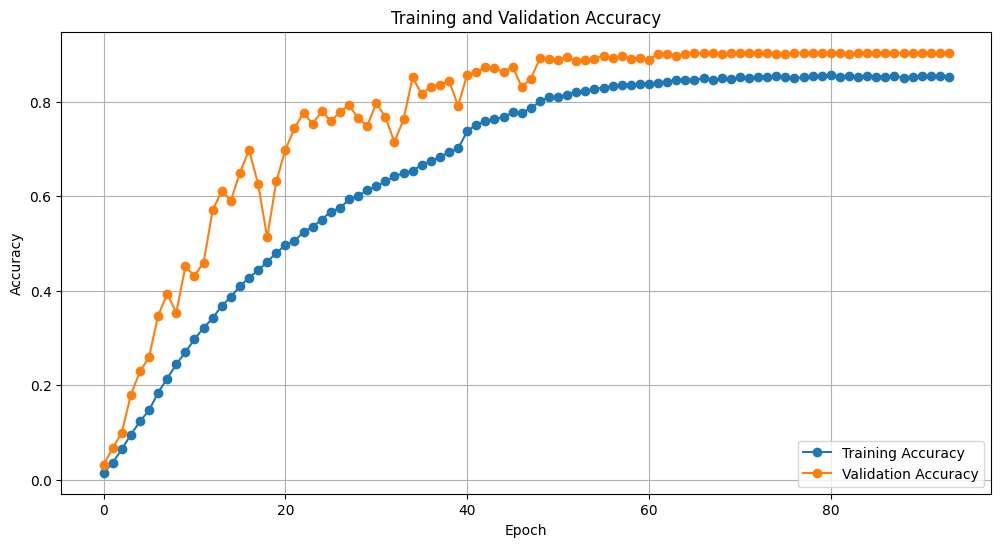

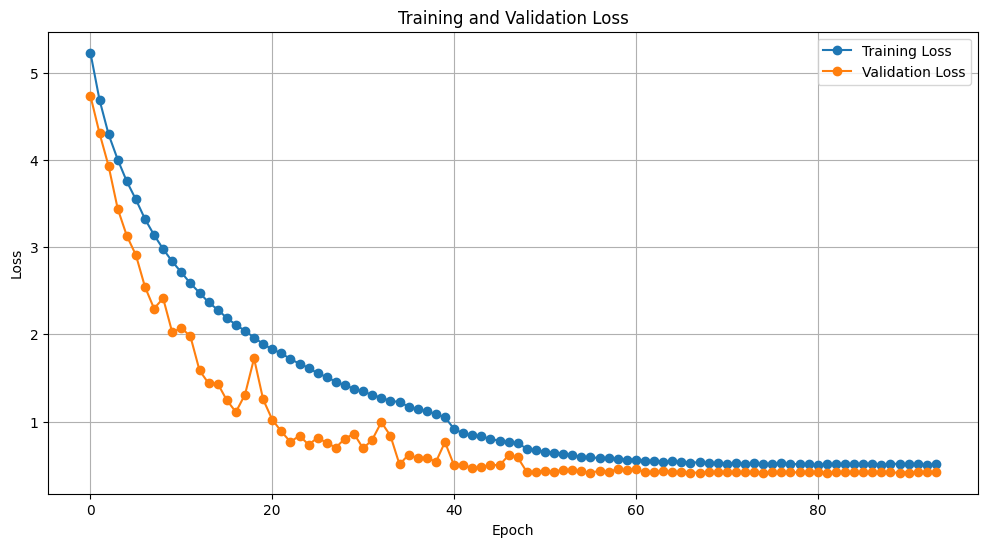

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.xticks([])
plt.yticks([])
plt.show()


NameError: name 'model' is not defined

In [ ]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Enable resource variables (if needed)
converter.experimental_enable_resource_variables = True


converter._experimental_lower_tensor_list_ops = False

# Allow Select TF Ops (if necessary)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]


tflite_model = converter.convert()


tflite_save_path = '/content/drive/MyDrive/kstm_model.tflite'


with open(tflite_save_path, 'wb') as f:
    f.write(tflite_model)

print(f"TensorFlow Lite model saved to {tflite_save_path}")


Saved artifact at '/tmp/tmpfm0obuly'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8, 1530), dtype=tf.float32, name='keras_tensor_14')
Output Type:
  TensorSpec(shape=(None, 200), dtype=tf.float32, name=None)
Captures:
  139586105436944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139586105436368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139586105426000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139586105435600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139586105441360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139586105433680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139586105427920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139586105435792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139586105426576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139586105434064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1395861054277